# Conway's game of life

**Source : Wiki**

The Game of Life, also known simply as Life, is a cellular automaton devised by the British mathematician John Horton Conway in 1970. It is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves. 

- It is Turing complete and can simulate a universal constructor or any other Turing machine.

---

## Rules

The universe of the Game of Life is an infinite, two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead, (or populated and unpopulated, respectively). Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

- Any live cell with fewer than two live neighbours dies, as if by underpopulation.
- Any live cell with two or three live neighbours lives on to the next generation.
- Any live cell with more than three live neighbours dies, as if by overpopulation.
- Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

 These rules can be condensed into the following:

- Any live cell with two or three live neighbours survives.
- Any dead cell with three live neighbours becomes a live cell.
- All other live cells die in the next generation. 
- Similarly, all other dead cells stay dead.

---

## Summary of principles

- The initial pattern constitutes the seed of the system. 
- The first generation is created by applying the above rules simultaneously to every cell in the seed, live or dead; births and deaths occur simultaneously, and the discrete moment at which this happens is sometimes called a tick. 
- Each generation is a pure function of the preceding one. 
- The rules continue to be applied repeatedly to create further generations.


---

# Making an animation

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import  matplotlib.animation

from matplotlib import animation

from IPython.display import HTML
%matplotlib inline

In [2]:

def plot_images(img_list):
  def init():
    img.set_data(img_list[0])
    return (img,)

  def animate(i):
    img.set_data(img_list[i])
    return (img,)

  fig = plt.figure()
  ax = fig.gca()
  plt.axis('off')
  img = ax.imshow(img_list[0])

  anim = animation.FuncAnimation(fig, animate, 
                                 init_func=init,
                                 frames=len(img_list), 
                                 interval=200, 
                                 blit=True)
  return anim

# use like this
#HTML(plot_images(imgs).to_html5_video())

In [35]:
#upload to github
! ../.g


On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
Everything up-to-date


In [4]:
G = np.zeros(100)
G.reshape((10,10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [5]:
G = np.random.randint(0,high=2, size=(10,10))
G

array([[1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 1]])

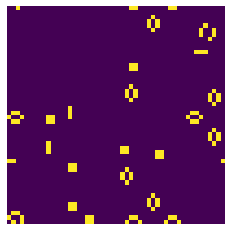

In [3]:
from scipy import signal
G = np.zeros((20,20), dtype=np.int0)


#G[3,4:7] = 1
#G[3:5,3:5] = 1
#G[3,4:7] = 1
#G[4,5:8] = 1

G[4,5:8] = 1
G[3,7] = 1
G[2,6] = 1

# noyau
K = np.ones((3,3), dtype=np.int8)
G = np.random.randint(0, high=2, size=(50,50))
frames = []
for k in range(1000):
    H = signal.convolve2d( G, K, boundary='wrap')[1:-1,1:-1]

    H[H<=2] = 0
    H[(H==4)&(G==0)] = 0
    H[H>4] = 0
    H[H>0] = 1
    G = H
    frames.append(np.copy(G))

HTML(plot_images(frames).to_html5_video())

---

# Klein Bottle

I use a [trick](https://math.stackexchange.com/questions/1073425/prove-that-there-is-a-two-sheeted-covering-of-the-klein-bottle-by-the-torus)
there is a two-sheeted covering of the Klein bottle by the torus.

![](./double_cover.jpg)

So my code 
- is almost the same as before 
- but I have to use 2 copies of the grid.

## Other stuff

[some slides](https://lindagreen.web.unc.edu/wp-content/uploads/sites/5262/2015/12/Math53_Part16_Topology.pdf)

- [games](http://www.geom.uiuc.edu/docs/forum/weeks_software/)
- [Week's games](https://www.geometrygames.org/TorusGames/index.html.en)



---

[Shape of the universe](https://www.nature.com/articles/news031006-8)

The Universe could be shaped like a soccer ball, say mathematicians

The idea is prompted by data from NASA's Wilkinson Microwave Anisotropy Probe (WMAP) satellite. This sees back to when the Universe was about 380,000 years old, and reveals the all-pervading radiation left over from the Big Bang - the cosmic microwave background.

There are fluctuations in this background, like waves in the sea. They are the legacy of the small lumps in the early Universe that gave rise to stars and galaxies.

An infinite Universe would contain waves of all sizes. The WMAP did not see any very large waves. This points to space being finite - for the same reasons that you don't see breakers in your bathtub.

The best explanation for these observations is that the cosmos is a Poincaré dodecahedral space, says a team led by Jeffrey Weeks, an independent mathematician based in Canton, New York. Mathematical models of a spherical, solid Universe edged by 12 curved pentagons produce the patterns seen in the background radiation without any special fine-tuning. "It fits the data surprisingly well," says Weeks.



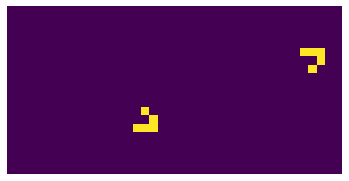

In [37]:
from scipy import signal
E = np.zeros((20,40), dtype=np.int0)
#E[3,4:7] = 1
#E[3:5,3:5] = 1
#E[3,4:7] = 1
#E[4,5:8] = 1

# this is a glider
E[4,5:8] = 1
E[3,7] = 1
E[2,6] = 1

E[:,20:] = np.flip(E[:,:20],axis=0)

# noyau
K = np.ones((3,3), dtype=np.int8)
K[1,1] = 0
#E = np.random.randint(0, high=2, size=(50,50))
frames = []
for k in range(200):
    S = signal.convolve2d( E, K, boundary='wrap')[1:-1,1:-1]
    T = np.zeros_like(E)
    T[ (S==3) | ( ( S == 2) & (E == 1) )] = 1
    E = T
    
    frames.append(np.copy(E[:,:]))


    
HTML(plot_images(frames).to_html5_video())

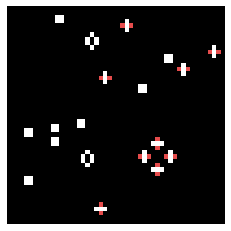

In [60]:
from scipy import signal

#kernel
K = np.ones((3,3), dtype=np.int8)
K[1,1] = 0
E = np.random.randint(0, high=2, size=(50,50))

x, y = E.shape
UU = np.zeros((x,y,3))

#going to make a video
frames = []
frames.append(np.copy(UU) )

drop_off = np.array([.9,.3,.3])

for k in range(1000):
    S = signal.convolve2d( E, K, boundary='wrap')[1:-1,1:-1]
    T = np.zeros_like(E)
    T[ (S==3) | (( S == 2) & (E == 1))] = 1
    E = T 
    # this is complicated :)
    UU = drop_off*np.copy(frames[-1])
    #copy in the white stuff
    for i in range(3):
        UU[:,:,i] = np.maximum(UU[:,:,i], T)
    frames.append(np.copy(UU) )


xx = plot_images(frames).to_html5_video()

In [67]:
# https://www.geeksforgeeks.org/how-to-save-matplotlib-animation/
writervideo = animation.FFMpegWriter(fps=25)
xx.save('tt.mp4', writer=writervideo)

AttributeError: 'str' object has no attribute 'save'

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


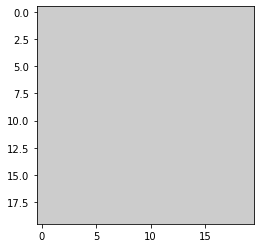

In [49]:
vv = np.array([.8,.8,.8])

xx = vv*np.ones((20,20,3))
xx[:,:,2]

plt.imshow(xx)

In [29]:
! ../.g

[master 387c4dd] web
 1 file changed, 17520 insertions(+), 48290 deletions(-)
 rewrite PROG/my_conway_life.ipynb (83%)
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 913.54 KiB | 16.03 MiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   78d9c6f..387c4dd  master -> master


In [22]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [23]:
dir(this)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'c',
 'd',
 'i',
 's']

In [24]:
this.__file__

'/home/macbuse/anaconda3/lib/python3.8/this.py'

In [26]:
with open(_,'r') as fp:
    dd = fp.read()

In [27]:
print(dd)

s = """Gur Mra bs Clguba, ol Gvz Crgref

Ornhgvshy vf orggre guna htyl.
Rkcyvpvg vf orggre guna vzcyvpvg.
Fvzcyr vf orggre guna pbzcyrk.
Pbzcyrk vf orggre guna pbzcyvpngrq.
Syng vf orggre guna arfgrq.
Fcnefr vf orggre guna qrafr.
Ernqnovyvgl pbhagf.
Fcrpvny pnfrf nera'g fcrpvny rabhtu gb oernx gur ehyrf.
Nygubhtu cenpgvpnyvgl orngf chevgl.
Reebef fubhyq arire cnff fvyragyl.
Hayrff rkcyvpvgyl fvyraprq.
Va gur snpr bs nzovthvgl, ershfr gur grzcgngvba gb thrff.
Gurer fubhyq or bar-- naq cersrenoyl bayl bar --boivbhf jnl gb qb vg.
Nygubhtu gung jnl znl abg or boivbhf ng svefg hayrff lbh'er Qhgpu.
Abj vf orggre guna arire.
Nygubhtu arire vf bsgra orggre guna *evtug* abj.
Vs gur vzcyrzragngvba vf uneq gb rkcynva, vg'f n onq vqrn.
Vs gur vzcyrzragngvba vf rnfl gb rkcynva, vg znl or n tbbq vqrn.
Anzrfcnprf ner bar ubaxvat terng vqrn -- yrg'f qb zber bs gubfr!"""

d = {}
for c in (65, 97):
    for i in range(26):
        d[chr(i+c)] = chr((i+13) % 26 + c)

print("".join([d.get(c, c) for c in s]

In [28]:
pwd

'/home/macbuse/Documents/macbuse.github.io/PROG'